In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from statsmodels.api import OLS
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

In [2]:
training_data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
training_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
columns_has_null = training_data.isna().sum().sort_values(ascending=False)
columns_has_null[columns_has_null > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [4]:
training_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)
columns_has_null = training_data.isna().sum().sort_values(ascending=False)
columns_has_null[columns_has_null > 0]

LotFrontage     259
GarageType       81
GarageCond       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

In [5]:
X_train = training_data.iloc[:, :-1]
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,112,0,0,0,0,4,2010,WD,Normal


# Label encoding

We apply Label Encoding when:

* The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
* Nothing, Gravel, Pavement
    * i.e. 0, 1, 2

In [6]:
def ConvertStringToInt(df):
  columns_to_encode = list(df.select_dtypes(include=['category','object'])) #gets all columns with non-numeric values
  le = LabelEncoder()
  for feature in columns_to_encode:
      try:
          df[feature] = le.fit_transform(df[feature])
      except:
          print('Error encoding '+feature)
  return df

In [7]:
X_train = ConvertStringToInt(X_train)
X_train = X_train.replace({np.NaN:0})
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,3,3,0,4,...,61,0,0,0,0,0,2,2008,8,4
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,0,5,2007,8,4
2,3,60,3,68.0,11250,1,0,3,0,4,...,42,0,0,0,0,0,9,2008,8,4
3,4,70,3,60.0,9550,1,0,3,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,5,60,3,84.0,14260,1,0,3,0,2,...,84,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,40,0,0,0,0,0,8,2007,8,4
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,0,0,0,0,0,0,2,2010,8,4
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,60,0,0,0,0,2500,5,2010,8,4
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,0,112,0,0,0,0,4,2010,8,4


In [32]:
y_train = training_data.iloc[:, -1:]
y_train = np.ravel(y_train)
y_train

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [33]:
testing_data = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")
testing_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [34]:
testing_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)
columns_has_null = testing_data.isna().sum().sort_values(ascending=False)
columns_has_null[columns_has_null > 0]

LotFrontage     227
GarageYrBlt      78
GarageFinish     78
GarageQual       78
GarageCond       78
GarageType       76
BsmtCond         45
BsmtExposure     44
BsmtQual         44
BsmtFinType1     42
BsmtFinType2     42
MasVnrType       16
MasVnrArea       15
MSZoning          4
Utilities         2
Functional        2
BsmtHalfBath      2
BsmtFullBath      2
Exterior2nd       1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
KitchenQual       1
TotalBsmtSF       1
Exterior1st       1
GarageArea        1
SaleType          1
GarageCars        1
dtype: int64

In [35]:
X_test = testing_data
X_test = ConvertStringToInt(X_test)
X_test = X_test.replace({np.NaN:-1})
y_test = None

In [36]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
print("train score:", forest.score(X_train,y_train))

train score: 0.9812735663809413


In [38]:
training_data = ConvertStringToInt(training_data)
training_data = training_data.replace({np.NaN:0})
X = training_data.iloc[:, :-1]
y = training_data.iloc[:, -1:]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, train_size=0.75)

In [40]:
y_test

,SalePrice
258,231500
267,179500
288,122000
649,84500
1233,142000
...,...
1017,187500
534,178000
1334,125000
1369,232000


In [41]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

C:\Users\Alexander\AppData\Local\Temp\ipykernel_16252\3799881120.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestRegressor()

## Show the difference in training and testing data to the one without string. (Sometimes without strings is better)
Labelencoder seems to be doing a bad job, bad weighting on the labels and the magnitude/order is not being taken into consideration.

In [42]:
print("model score on training data:", forest.score(X_train, y_train))

model score on training data: 0.976601498622483


In [43]:
print("model score on test data:", forest.score(X_test, y_test))

model score on test data: 0.8963183539557861


In [44]:
sns.set_context("paper")
sns.set_style("ticks")

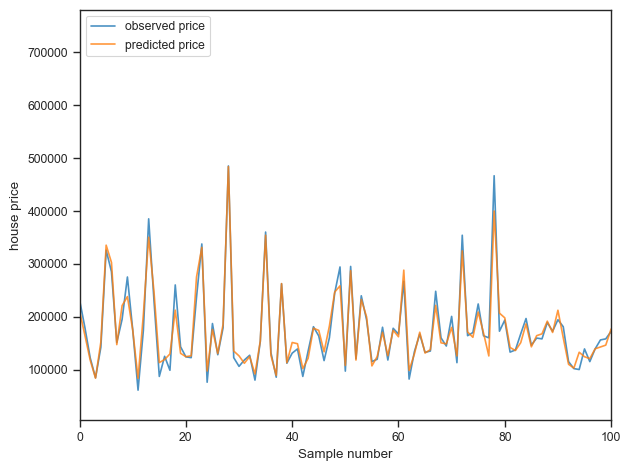

In [45]:
fig,ax = plt.subplots()
plt.plot(y_test.to_numpy(), alpha = 0.8,label=r"observed price")
plt.plot(forest.predict(X_test), alpha=0.8, label=r"predicted price")

#always label your axes
plt.xlabel(r"Sample number")
plt.ylabel(r"house price")

# create a legend
plt.legend(loc="upper left")
#ax.xaxis.set_minor_locator(MultipleLocator(2))
#ax.yaxis.set_minor_locator(MultipleLocator(0.2))
plt.xlim(0,100)
#plt.ylim(0.5,6)
plt.tight_layout()
#plt.savefig("House_price_regression.png", dpi=600)
#sns.despine()
plt.show()

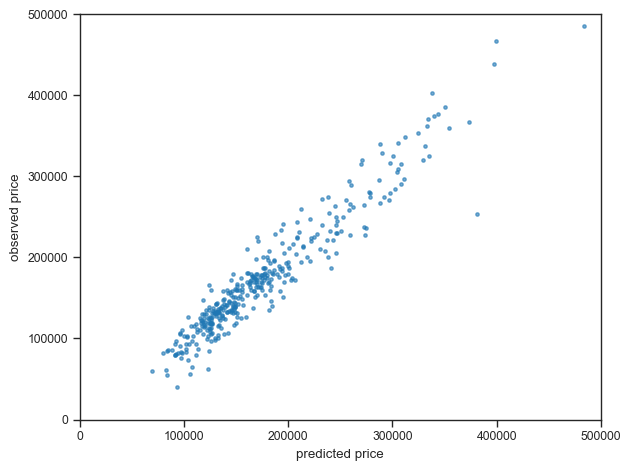

In [46]:
fig,ax = plt.subplots()
plt.plot(forest.predict(X_test), y_test.to_numpy(), ".", alpha=0.6)

plt.xlabel(r"predicted price")
plt.ylabel(r"observed price")

plt.xlim(0,500000)
plt.ylim(0,500000)

plt.tight_layout()
#plt.savefig("predicted_house_price_regression_correlation.png", dpi=600)
plt.show()

In [47]:
feature_names = [x for x in X.columns]
importances = forest.feature_importances_
sorted_lists = sorted(zip(importances, feature_names), reverse=True)
importances, feature_names = [[x[0] for x in sorted_lists], [x[1] for x in sorted_lists]]

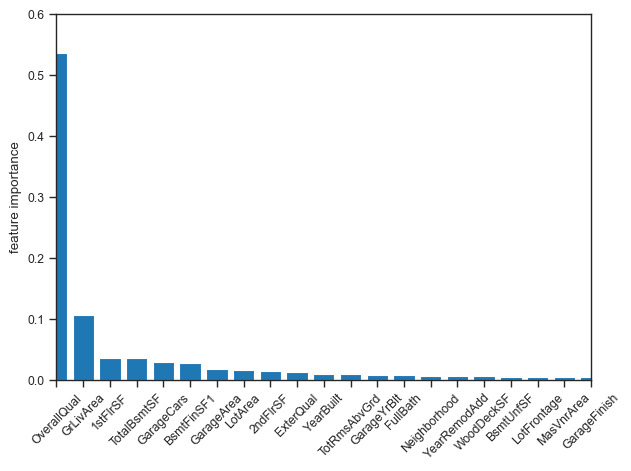

In [48]:
plt.figure()
plt.bar(feature_names, importances)
plt.xticks(rotation=45)
plt.ylabel(r"feature importance")
plt.ylim(0,0.6)
plt.xlim(0,20)
plt.tight_layout()
plt.show()